In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn
import sympy as sp
sp.init_printing()
plt.rcParams['axes.labelsize'] = 22

# Picking scratchcards

Imagine you have decided to buy four scratch cards, there are 4 different types of games, each with the same probability $p=0.25$ of winning (according to the back of the pack). Should you either pick four from one game, or one from each of the four games? 

This question is open to intepretation of the setup, but it is a fun way to learn about some distributions and calculating probabilities so let's begin. Note that we will do the usual thing of ignoring the real world where the cards have different probabilities and different prizes.

## Finite and fixed number of winners and loosers

First let us imagine that the scratch cards come in boxes with $N$ cards, and that in each box there is $pN \in \mathbb{Z}$ winners. For any box, on the first draw the probability of winning is clearly just $p$. Now if we don't look at that first card to determine if it is a winner or not, should we now pick from the same box, or a different one? There is an inuitive way to get to this answer, but instead let's use some statistics.

### Pick four from one box
First we will calculate the probability for picking at least one winner from a single box.
It turns out that the correct distribution to describe this sitation is the [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution) which is derived very nicely from the first principlces of sampling *without* replacement in [Jaynes](http://www.cambridge.org/gb/academic/subjects/physics/theoretical-physics-and-mathematical-physics/probability-theory-logic-science?format=HB&isbn=9780521592710). This tells us that, the probability to find $k$ winners having drawn $n$ cards is

\begin{equation}
P(k; N, n, p) = \frac{\binom {N} {k} \binom{N-pN}{n-k}}{\binom{N}{n}}
\end{equation}

The familiar [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) can be found by taking the limit $N\rightarrow\infty$ of the hypergeometric distribution; often the binomial distribution is used as a good approximation when we consider sampling *with* replacement and $N \gg n$. The binomial probability of having $k$ successes given $n$ draws when the probability is $p$ is given by

\begin{equation}
P(k; n, p) = \binom {n} {k} p^{k}(1-p)^{n-k}
\end{equation}

Notice here that the binomial distribution has no dependance on $N$. We can gain some intuition by plotting both probabilities taken $p=0.25$ and $n=4$

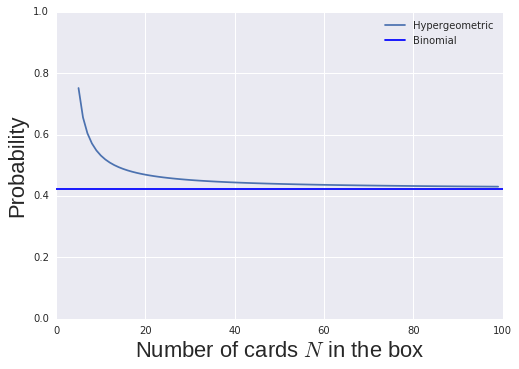

In [26]:
p = 0.25
n = 4
N = np.arange(5, 100, 1)
plt.plot(N, [ss.hypergeom.pmf(1, Ni, n, p*Ni) for Ni in N], label="Hypergeometric")
plt.axhline(ss.binom.pmf(1, n, p), label="Binomial")
plt.ylabel("Probability")
plt.xlabel("Number of cards $N$ in the box")
plt.legend()
plt.ylim(0, 1)
plt.show()

The point to notice here, is that as $N$ increases, the hypergeometric tends to the binomial which is expected since the latter is found by taking this limit of the former. What this should tell us, is that if the boxes are finite we get a different, and slightly greater probability! 

#### Probability of winning at all

The binomial and hypergeometric results discussed above looked at the case of winning exactlty once $k=1$. However, there is a non-zero probability that you will in fact win twice! For simplicity let us stick with the binomial results: the probability of winning at all can be found from

\begin{align}
P(\textrm{at least on one when picking 4 from 1}) = \sum_{k=1}^{\infty} P(k; n, p)
\end{align}
Or converserly
\begin{align}
P(\textrm{at least on one when picking 4 from 1}) = 1 - P(0; n, p)
\end{align}

Taking then $n=4$ 

\begin{align}
\binom {n=4} {k=0} = 1
\end{align}

and so the probability that we are interested in is:

In [39]:
n = 4
k = 0
p = sp.symbols("p")
1 - sp.expand(p**k * (1-p)**(n-k))

We could repeat this with the hypergeometric and we would get a slightly larger probability.

### Pick one from four boxes

In this instance there isn't an obvious statistical model to apply, so we will go from first principles. Lets name the four boxes $A, B, C, D$. For each box the probability of winning is simply $p$, therefore let's define the probability of winning on box $A$ as $P(A)$, then

\begin{align}
P(A) = P(B) = P(C) = P(D) = p
\end{align}

Now what we are after is the probability of winning on one of the boxes, given that we pick one from each of them. In the language of probability this is

$$ P(A + B + C + D) $$

You can think of the $+$ as a the logical OR operator here. Now  we need some basics of probability theory, the **sum rule**,
\begin{align}
P(A + B) = P(A) + P(B) - P(AB)
\end{align}
where $AB$ expresses $A$ and $B$, and the **product rule**
\begin{align}
P(AB) = P(A|B)P(B)
\end{align}
where $A|B$ expresses $A$ conditional on $B$ being true.

Since we our boxes are independent, it is clear that $P(A|B) = P(A)$. Now we are apply the produce rule

\begin{align}
P(A + B + C + D) =& P(A+B) + P(C+D) - P((A+B)(C+D)) \\
=&P(A) + P(B) - P(AB) + P(C) + P(D) - P(CD) - P(A+B)P(C+D)\\
=&P(A) + P(B) + P(C) + P(D) - P(AB) - P(CD) - \left[P(A)+P(B)-P(AB)\right[\left[P(C) + P(D) - P(CD)\right] \\
=&P(A) + P(B) + P(C) + P(D) \\
& - \left[P(A)P(B) + P(A)P(C)+P(A)P(D)+P(B)P(C)+P(B)P(D)+P(C)P(D)\right] \\
& + \left[P(A)P(B)P(C) + P(A)P(B)P(D) + P(A)P(C)P(D) + P(B)P(C)P(D)\right] \\
& - P(A)P(B)P(C)P(D)
\end{align}

You'll notice we have grouped the expanded probabilities due to the number of combinations, let's plugin in the probability $p$

\begin{align}
P(A + B + C + D) = 4p -6p^2 + 4p^3 - p^4
\end{align}

Now compare this with the probability of getting at least one, when picking 4 from 1 calculated above: **they are the same**! This may have been intuitively obvious to some people, and is really a consequence of the mathematics, but for me it is nice to see it come out like this.


## Conclusions

If you are convinced that your local shop sells scratch cards which conform to the somewhat simplified assumptions made here, then you are better off buying four from one, than one from four. The degree to which you could notice this is determined by the size $N$ of the population when they first print them, assuming they don't generate them probabilistically - which means you have the same odds either way. 